#Step 1: Install and Import Libraries & Dataset

In [1]:
#Install TALIB---------------------------------------------------------
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install

!pip install Ta-Lib
import talib as ta

--2024-04-02 13:10:58--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-04-02 13:10:58--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-04-02 13:10:58--  http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl.s

In [2]:
#Install yfinance------------------------------------------------------
!pip install yfinance
import yfinance as yf

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ticker = 'TSLA'
df = yf.download(\
                 ticker,
                 start = '2020-01-01')

[*********************100%%**********************]  1 of 1 completed




---



#Step 2: Plot the RSI

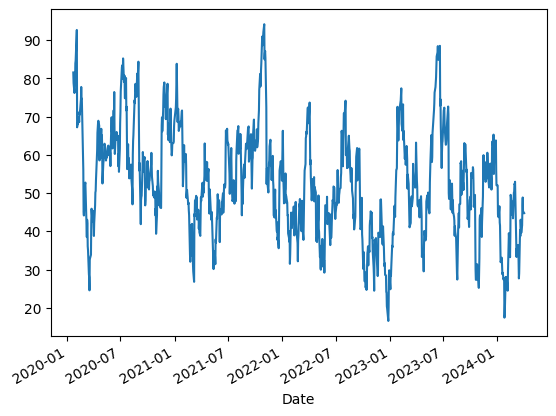

In [4]:
df['RSI'] = ta.RSI(df['Close'].values,
                   timeperiod=14)

df['RSI'].plot()
plt.show()



---



#Step 3: Create the Signal using RSI

In [5]:
df['Signal'] = np.where(df['RSI'] < 30, 1,           #1 means BUY
                        np.where(df['RSI'] > 70, 0,  #0 means SELL
                                 np.nan))

df1 = df[['RSI', 'Signal']]
df1 = df1.dropna()

print(df1)

#If RSI < 30 --> Buy
#If RSI > 70 --> Sell

                  RSI  Signal
Date                         
2020-01-23  81.575907     0.0
2020-01-24  78.789833     0.0
2020-01-27  76.207187     0.0
2020-01-28  77.255654     0.0
2020-01-29  78.848365     0.0
...               ...     ...
2024-02-02  27.596039     1.0
2024-02-05  24.481733     1.0
2024-02-06  29.532739     1.0
2024-03-14  27.692601     1.0
2024-03-15  29.028736     1.0

[179 rows x 2 columns]




---



#Step 4: Train Test Split

In [6]:
X = df1.RSI
y = df1.Signal

In [7]:
split = int(0.8*len(X))

X_train, X_test, y_train, y_test = X[:split],\
                                   X[split:],\
                                   y[:split],\
                                   y[split:]

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)



---



#Step 5: Fit Logistic Regression Curve & Get Coeficient and Intercept

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

a = model.coef_
b = model.intercept_

print(f'Model Coefficient is {a}')
print (f'Model Intercept is {b}')

Model Coefficient is [[-0.38069331]]
Model Intercept is [18.77286186]




---



#Step 6: Plot the Logistic Function

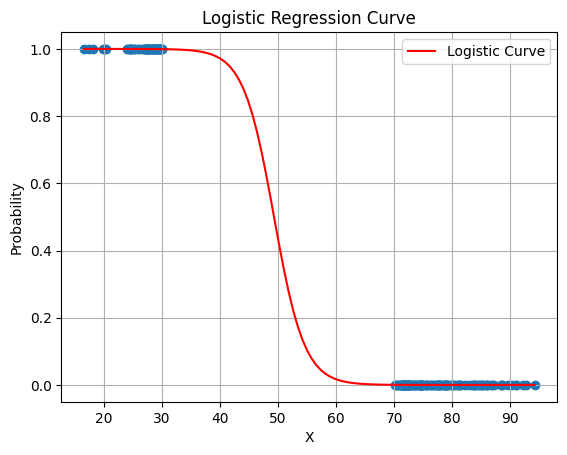

In [9]:
#----------------------------------------------------------------
# Create DEF
#----------------------------------------------------------------
def logistic_func(X, a, b):
  return 1 / (1 + np.exp(-(a * X + b)))

#----------------------------------------------------------------
# Generate X_new and y_new
#----------------------------------------------------------------
# Generate x-axis values for a smooth curve
X_new = np.linspace(min(X), max(X), 100)

# Calculate y-values for the curve using the logistic function
y_new = logistic_func(X_new, a, b)
y_new = y_new.flatten()

#----------------------------------------------------------------
# Plotting & Cosmetics
#----------------------------------------------------------------
# Plot the data points and the logistic curve
plt.scatter(X, y)
plt.plot(X_new, y_new, color='red', label='Logistic Curve')

# Customize the plot for better visualization
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Logistic Regression Curve')
plt.legend()
plt.grid(True)  # Add gridlines for better readability (optional)
plt.show()



---



#Step 7: Compare between Predicted vs Truth

In [10]:
y_pred = model.predict(X_test)

comparison = pd.DataFrame({
    'predicted': y_pred.tolist(),
    'actual': y_test.values.tolist()
    })

print(comparison)

    predicted  actual
0         0.0     0.0
1         0.0     0.0
2         0.0     0.0
3         0.0     0.0
4         0.0     0.0
5         0.0     0.0
6         0.0     0.0
7         0.0     0.0
8         0.0     0.0
9         0.0     0.0
10        0.0     0.0
11        1.0     1.0
12        1.0     1.0
13        1.0     1.0
14        1.0     1.0
15        1.0     1.0
16        1.0     1.0
17        1.0     1.0
18        1.0     1.0
19        1.0     1.0
20        1.0     1.0
21        1.0     1.0
22        1.0     1.0
23        1.0     1.0
24        1.0     1.0
25        1.0     1.0
26        1.0     1.0
27        1.0     1.0
28        1.0     1.0
29        1.0     1.0
30        1.0     1.0
31        1.0     1.0
32        1.0     1.0
33        1.0     1.0
34        1.0     1.0
35        1.0     1.0




---



#Step 8: Check the Accuracy

In [11]:
from sklearn.metrics import classification_report

target_names = ['class 0: SELL', 'class 1: BUY']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

class 0: SELL       1.00      1.00      1.00        11
 class 1: BUY       1.00      1.00      1.00        25

     accuracy                           1.00        36
    macro avg       1.00      1.00      1.00        36
 weighted avg       1.00      1.00      1.00        36





---



#Step 9: Predict

In [24]:
test = model.predict([[55]])
print(test)

#If RSI < 30 --> Buy (1)
#If RSI > 70 --> Sell (0)
#according to the log curve below, it appears
#the turning point is around 48....
#thus anything <48 will be Buy
#thus anything >48 will be Sell

[0.]


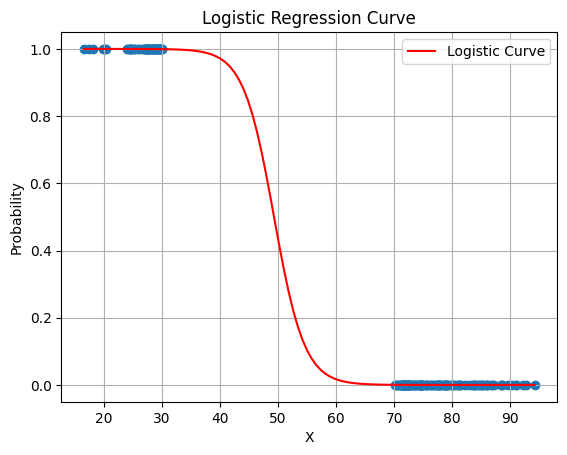



---



#THE END


---

